In [134]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as mpatches
import math
import matplotlib.lines as mlines
import os
import cv2 as cv
from IPython.display import Video
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
from statistics import mean
from scipy.optimize import curve_fit
from matplotlib.pyplot import figure
import pandas as pd

In [136]:
save_path = 'C:\\Users\\khart\\Documents\\Summer2022Campaign\\IRCSP2\\40C_long\\'
angle_step = 1;
angle_start = 0;
angle_stop = 1860;
angles = list(range(angle_start,angle_stop,angle_step))
numangles = len(angles)
imgs1 = np.empty([numangles,1,256,320])
imgs2 = np.empty([numangles,1,256,320])
t1 = np.empty([numangles])
t2 = np.empty([numangles])

for a in range(angle_start,angle_stop,angle_step):
    try:
        with h5py.File(save_path + 'meas_'+str(int(a))+'.h5', "r") as f:

            # List all groups
            #print(f.keys())
            #print(f.attrs.keys())
      
            imgs1[a,:,:] = np.array(f[list(f.keys())[0]])
            imgs2[a,:,:] = np.array(f[list(f.keys())[1]])
            t1[a] = np.array(f[list(f.keys())[2]])
            t2[a] = np.array(f[list(f.keys())[3]])
    
    except:
            print(a)

306


In [137]:
im2 = imgs2[:,0,110:130,160:220]
im2 = im2.transpose()

im1 = imgs1[:,0,90:110:,140:200]
im1 = im1.transpose()

ak1 = imgs1[:,0,90:110:,50:110]
ak1 = ak1.transpose()

ak2 = imgs2[:,0,110:130,50:110]
ak2 = ak2.transpose()

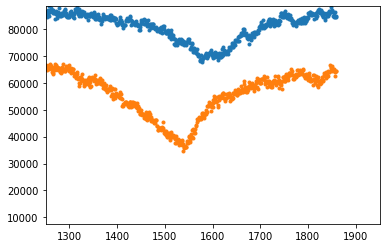

In [144]:

ack2  =ak2.sum(axis=tuple(range(ak2.ndim - 1)))
ack1  = ak1.sum(axis=tuple(range(ak1.ndim - 1)))
active2 =im2.sum(axis=tuple(range(im2.ndim - 1)))
active1 =im1.sum(axis=tuple(range(im1.ndim - 1)))


plt.plot(active2-ack2,'.')
plt.plot(active1-ack1,'.')
plt.ylim(np.partition(active1-ack1, 4)[4],(active2-ack2).max())
plt.xlim(1250)
plt.show()

In [131]:
telem_df = pd.read_csv(save_path+'telemetry.csv',header = None)

In [124]:
telem_df

,0,1,2,3,4,5,6,7,8,9
0,905.89,25.27,16.40,922.79,21.34,23.14,16.323,20.8,20.3,14.02.04
1,905.89,25.27,16.40,922.78,21.56,23.14,16.323,20.7,20.3,14.02.08
2,905.92,25.28,16.40,922.76,21.06,23.15,16.411,20.7,20.3,14.02.12
3,905.91,25.27,16.41,922.78,20.99,23.15,16.323,20.8,20.3,14.02.16
4,905.88,25.28,16.40,922.77,20.88,23.15,16.323,20.8,20.3,14.02.19
...,...,...,...,...,...,...,...,...,...,...
1756,900.54,26.51,14.45,921.75,19.35,23.39,13.854,18.7,18.2,15.55.50
1757,900.56,26.50,14.44,921.74,19.33,23.40,13.765,18.7,18.1,15.55.54
1758,900.51,26.51,14.43,921.78,19.39,23.39,13.765,18.7,18.1,15.55.58
1759,900.45,26.52,14.41,921.73,19.35,23.38,13.765,18.7,18.1,15.56.01


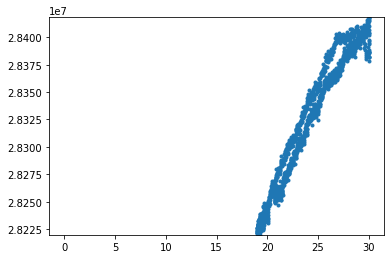

In [85]:
plt.plot(t1,ack1[:-1],'.')
plt.ylim(np.partition(ack1, 4)[4],ack1.max())
plt.show()


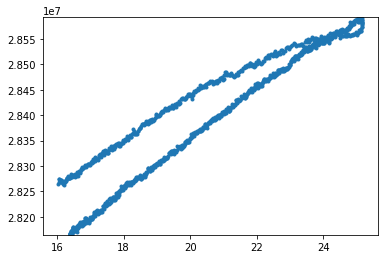

In [76]:
plt.plot(telem_df[2][0:angle_stop],ack2,'.')
plt.ylim(np.partition(ack2, 4)[4],ack2.max())
plt.show()
